<a href="https://colab.research.google.com/github/KevinFiorentino/JupyterNotebook/blob/master/Jupyter_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Preparación del Entorno

In [0]:
#Instalamos API de kaggle
!pip install -q kaggle
!pip install -q kaggle-cli

import json

    100% |████████████████████████████████| 81kB 3.1MB/s 
    100% |████████████████████████████████| 5.3MB 4.6MB/s 
    100% |████████████████████████████████| 51kB 19.0MB/s 
    100% |████████████████████████████████| 102kB 28.2MB/s 


In [0]:
#Creamos directorio en la carpeta personal de usuario, creamos archivo .json, permisos y listamos
!mkdir -p ~/.kaggle
!:> ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

gender_submission.csv  kaggle.json  test.csv  train.csv


In [0]:
#¿Quién soy? Python no acepta ~
!whoami
#Seteamos el contenido de kaggle.json con nuestra autenticación
api_token = {"username":"kevinxampp","key":"b9497553cff77aebda1b7537707153f6"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
          json.dump(api_token, file)

root


In [0]:
#Chequeamos contenido del directorio .kaggle y del archivo kaggle.json
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 69 Apr 28 15:43 kaggle.json
{"username": "kevinxampp", "key": "b9497553cff77aebda1b7537707153f6"}

In [0]:
!kaggle --version

Kaggle API 1.5.3


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 


# Prototipo I - Kevin - Titanic

### 1) Entendimiento del Negocio

Diccionario de Datos: https://www.kaggle.com/c/titanic/data

In [0]:
#Descargamos CSV Titanic, lo guardamos en la carpeta del usuario
!cd ~/.kaggle/ && kaggle competitions download -c titanic && ls -a

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 23.9MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.81MB/s]
.  ..  gender_submission.csv  kaggle.json  test.csv  train.csv


In [0]:
!cd root/.kaggle && ls -a

/bin/bash: line 0: cd: root/.kaggle: No such file or directory


### 2) Entendimiento de los Datos

In [0]:
#Leemos el CSV 'train' con Pandas
dataTrain = pd.read_csv('/root/.kaggle/train.csv', sep=',', index_col=0)

In [0]:
#Creamos DataFrame 'train'
train = pd.DataFrame(dataTrain)
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1) #Quitamos columnas que no nos interesan
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [0]:
#Leemos el CSV 'test' con Pandas
dataTest = pd.read_csv('/root/.kaggle/test.csv', sep=',', index_col=0)

In [0]:
#Creamos DataFrame 'test', la diferencia con 'train' es la ausencia de la variable target Survived
test = pd.DataFrame(dataTest)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1) #Quitamos columnas que no nos interesan
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [0]:
#Convertimos los datos del género en numéricos
train.Sex = train.Sex.replace({"male":1, "female" : 0})
test.Sex = test.Sex.replace({"male":1, "female" : 0})

In [0]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [0]:
print("Valores nulos en train dataset:\n{}".format(train.isnull().sum()))

Valores nulos en train dataset:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [0]:
print("Valores nulos en test dataset:\n{}".format(test.isnull().sum()))

Valores nulos en test dataset:
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


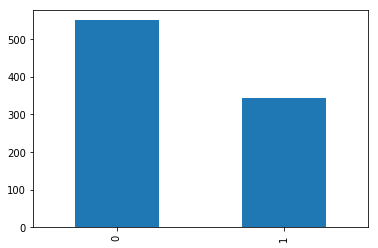

In [0]:
train['Survived'].value_counts().plot.bar()

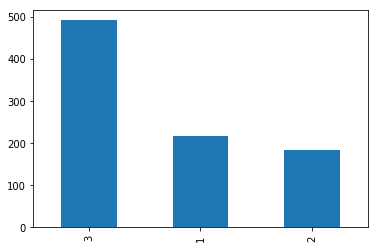

In [0]:
train["Pclass"].value_counts().plot.bar()

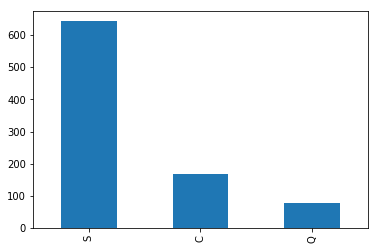

In [0]:
train['Embarked'].value_counts().plot.bar()

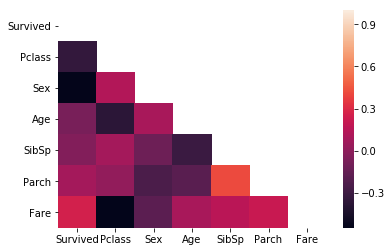

In [0]:
#Correlación entre variables
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, square=False, mask=mask)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


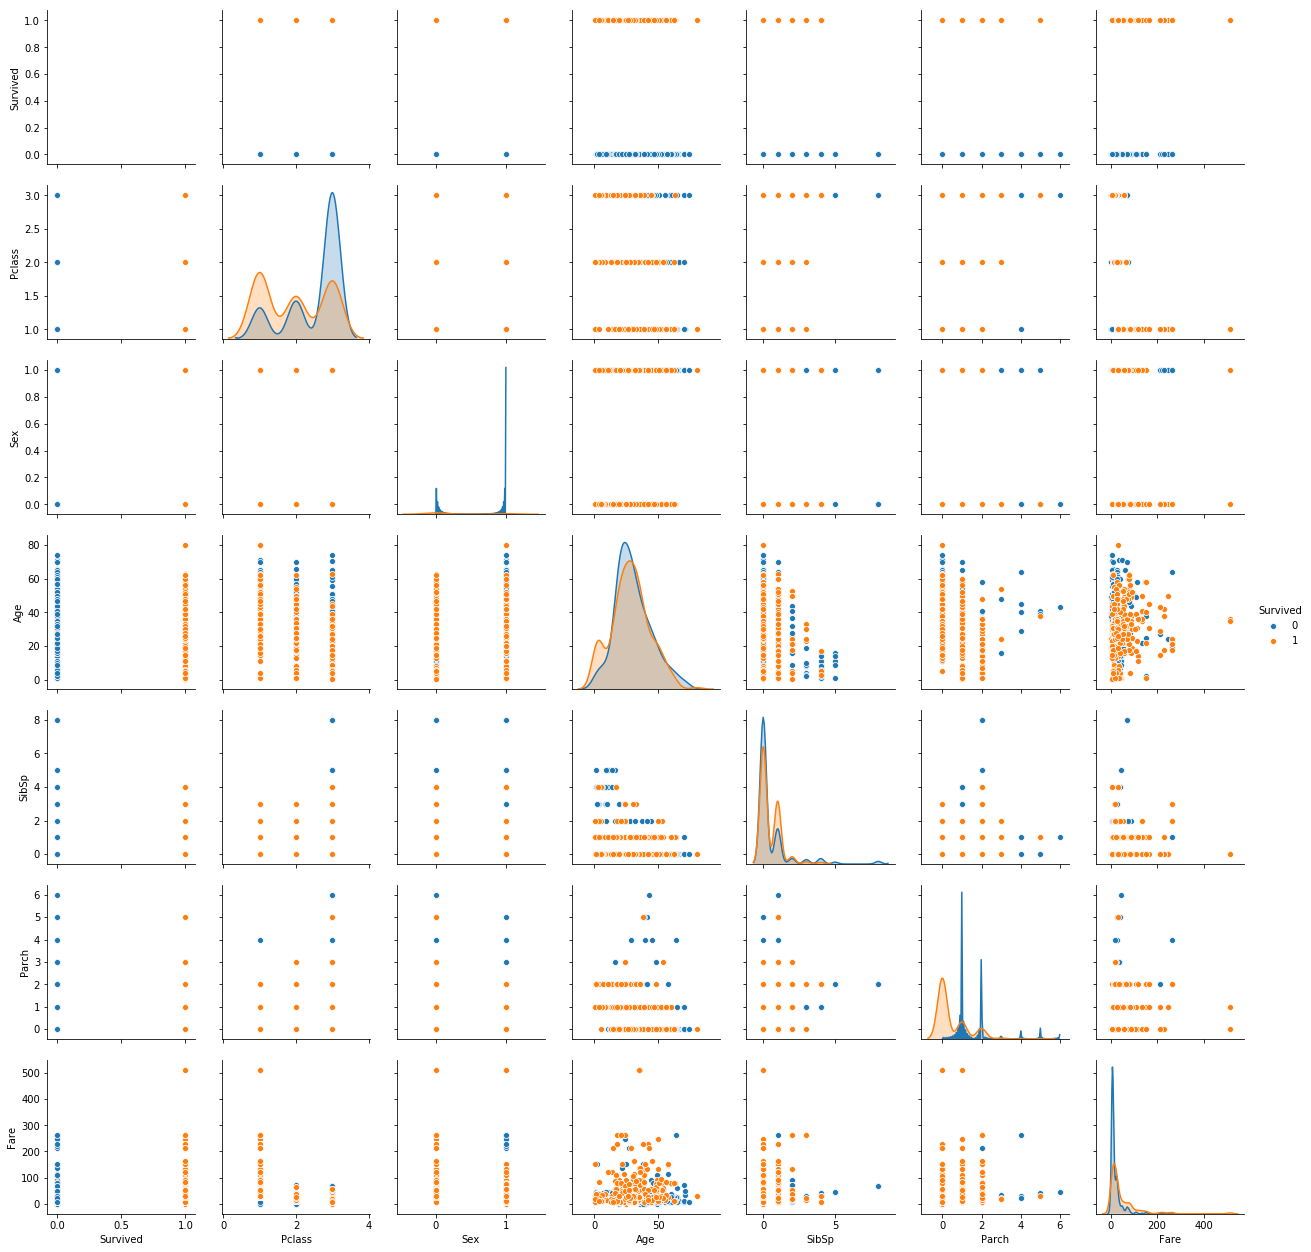

In [0]:
#Relaciones entre las variables
sns.pairplot(train, hue = 'Survived', diag_kind="kde") 

In [0]:
train.groupby(['Survived'], axis=0).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [0]:
train.groupby(['Pclass'], axis=0).mean()

,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,0.629630,0.564815,38.233441,0.416667,0.356481,84.154687
2,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
3,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550


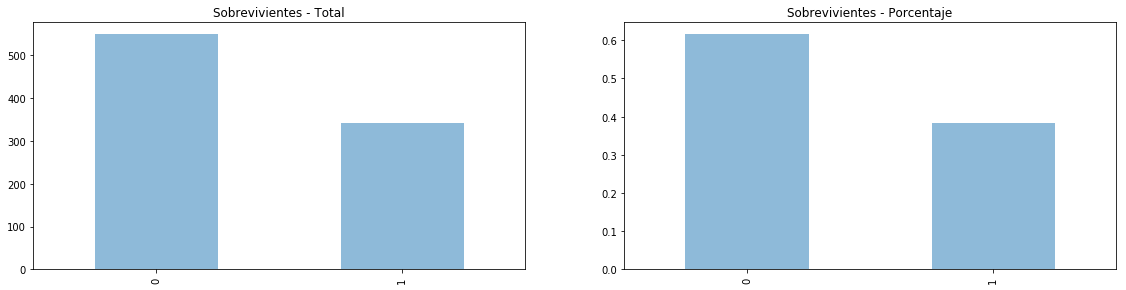

In [0]:
#Supervivencia Total en cantidad y porcentaje
fig = plt.figure(figsize=(30,10))

plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Sobrevivientes - Total')

plt.subplot2grid((2,3),(0,1))
train.Survived.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivientes - Porcentaje')

plt.show()

Vemos que sobrevivieron aproximadamente 350 personas, menos de un 40% de la tripulación

Text(0.5, 1.0, 'Sobrevivientes por Clase')

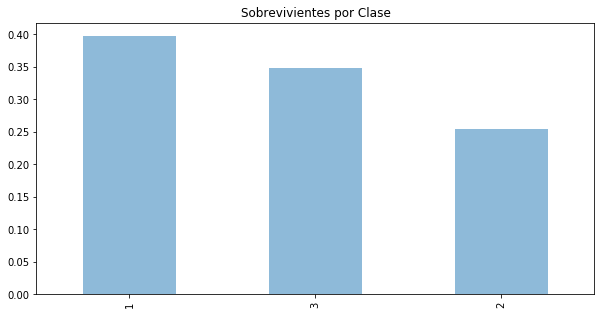

In [0]:
#Supervivencia por Clase
fig = plt.figure(figsize=(10,5))
train.Pclass[train.Survived == 1].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivientes por Clase')

La tripulación de clase intermedia fueron los que menos sobrevivieron

Text(0.5, 1.0, 'Sobrevivientes M vs. F')

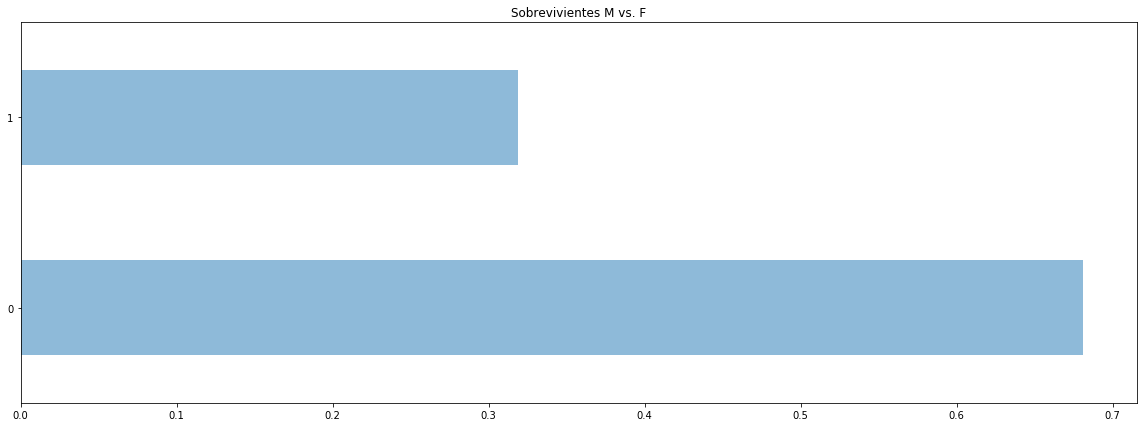

In [0]:
#Supervivencia por género
fig = plt.figure(figsize=(20,7))
train.Sex[train.Survived == 1].value_counts(normalize = True).plot(kind='barh', alpha=0.5)
plt.title('Sobrevivientes M vs. F')

Mayor supervivencia del género femenino

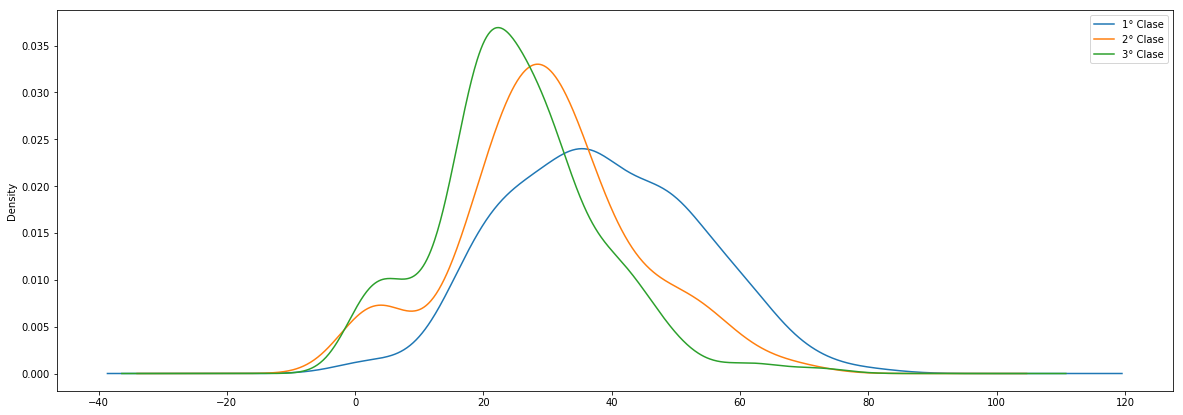

In [0]:
#Relación Edad con Clase Social
fig = plt.figure(figsize=(20,7))

for t_class in [1,2,3]:
  train.Age[train.Pclass == t_class].plot(kind='kde')
  
plt.legend(('1° Clase', '2° Clase', '3° Clase'))
plt.show()

### 3) Modelado

- Clasificar muerte de los pasajeros según su Sexo, Clase Social u otras variables.
- Predecir supervivencia de un pasajero.

### 4) Preparación de los Datos

In [0]:
#Construimos nuevamente los DataFrame
train = pd.DataFrame(dataTrain)
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

test = pd.DataFrame(dataTest)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [0]:
#Convertimos los datos del género en numéricos
train.Sex = train.Sex.replace({"male":1, "female" : 0})
test.Sex = test.Sex.replace({"male":1, "female" : 0})

In [0]:
#Rellenamos valores nulos con la mediana en caso de la edad y la tarifa. En 'Embarked' rellenamos con una S
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].fillna('S'), inplace = True)

test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [0]:
#Chequeamos nuevamente si se rellenaron los valores nulos
print("null values in train dataset:\n{}".format(train.isnull().sum()))
print('***'*20)
print("null values in train dataset:\n{}".format(test.isnull().sum()))

null values in train dataset:
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64
************************************************************
null values in train dataset:
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 5) Implementación

In [0]:
X_train = train.drop(['Survived', 'Embarked'], axis=1)
y_train = train['Survived']
X_test = test.drop(['Embarked'], axis=1)

subData = pd.read_csv('/root/.kaggle/gender_submission.csv', sep=',', index_col=0)
sub = pd.DataFrame(subData)
y_test = sub['Survived']

#Los dataset de kaggle se dividen en tres partes:
#  train.csv:             Contiene los datos para entrenar al algoritmo y su variable target
#  test.csv:              Contiene los datos para predecir
#  gender_submission.csv: Contiene la variable target de los datos del test.csv

In [0]:
y_test.head()

PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Survived, dtype: int64

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

logReg.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7991021324354658

In [0]:
#Linear Reggression
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)

linReg.score(X_train, y_train)

0.394929084448447

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf.score(X_train, y_train)

0.8226711560044894

### 6) Evaluación

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
MSE = mean_squared_error(y_test, y_pred)
print("MSE = {}".format(MSE))

MSE = 0.03588516746411483


MSE devuelve el valor al cuadrado, hay que calcular la raíz

https://www.kaggle.com/namratesh/titanic-machine-learning-from-disaster/notebook